# PRICE ESTIMATOR MODEL

# Part 1: Exploratory Data Analysis

## All Imports below :

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# Data preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#Models 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Metrics
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

#Selection of hyperparameters
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate


In [3]:
# LOADING THE DATA HERE
df = pd.read_csv('UJ_datatask_prices.csv',index_col=0,low_memory=False)
df.head(5)

,QUOTEID,Insurer,Product,PaymentMethod,PaymentFrequency,TotalCostPerPaymentPeriod,TotalPremiumIncludingIPT,TotalPremiumExcludingIPT,AdministrationChargeIncludingIPT,AdministrationChargeExcludingIPT,...,HOMEEMERGENCY,CREDITREPORT,PERMOCCUPIED,SUBSIDENCE,CONVICTIONS,INSURANCEDECLINES,FLOODING,UNOCCUPIED60,BUSINESSPURPOSES,UNMORTGAGEAPP
ID,,,,,,,,,,,,,,,,,,,,,
1,1,A,Home Insurance,DirectDebit,Annual,114.92,114.92,104.47,39.6,36,...,False,True,True,False,False,False,False,False,False,False
2,1,A,Home Insurance,CreditCard,Annual,116.64,114.92,104.47,39.6,36,...,False,True,True,False,False,False,False,False,False,False
3,1,A,Home Insurance,DebitCard,Annual,114.92,114.92,104.47,39.6,36,...,False,True,True,False,False,False,False,False,False,False
4,1,A,Home Insurance,DirectDebit,Monthly2MonthsFree,12.64,114.92,104.47,39.6,36,...,False,True,True,False,False,False,False,False,False,False
5,1,A,Home Insurance,DirectDebit,Monthly,10.53,114.92,104.47,39.6,36,...,False,True,True,False,False,False,False,False,False,False


In [4]:
df.TotalAmountPayable.value_counts()

TotalAmountPayable
149.94    979
136.31    972
113.48    816
103.16    816
138.35    486
         ... 
182.53      1
459.73      1
182.54      1
459.74      1
172.75      1
Name: count, Length: 13432, dtype: int64

 check datatypes error warning 

In [5]:
df.shape

(385025, 66)

# Droping Duplicates

In [6]:
# Find the number of duplicates
df.duplicated().sum()

0

In [7]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='TotalAmountPayable'),df.TotalAmountPayable, train_size=.8, random_state=42)

In [8]:
y_train

ID
211255    173.55
21383     249.92
201557    240.45
264565    187.21
287134    224.11
           ...  
259179    449.60
365839    310.20
131933    305.59
146868    156.85
121959    281.57
Name: TotalAmountPayable, Length: 308020, dtype: float64

In [9]:
# Basics statistics
X_train.describe()

,QUOTEID,TotalCostPerPaymentPeriod,TotalPremiumIncludingIPT,TotalPremiumExcludingIPT,AdministrationChargeIncludingIPT,AdministrationChargeExcludingIPT,InsurancePremiumTax,HouseholdInsurancePremiumIncludingIPT,OriginalHouseholdInsurancePremiumExcludingIPT,HouseholdInsurancePremiumExcludingIPT,...,LegalExpensesPremiumExcludingIPT,OriginalBuildingsCoverGrossExcludingIPT,BuildingsCoverGrossExcludingIPT,OriginalContentsCoverGrossExcludingIPT,ContentsCoverGrossExcludingIPT,OriginalPersonalCoverGrossExcludingIPT,PersonalCoverGrossExcludingIPT,TransactionCharge,INDUSTRY,BUILDYEAR
count,308020.000000,308020.000000,308020.000000,308020.000000,3.080200e+05,308020.0,308020.000000,308020.000000,308020.000000,308020.000000,...,308020.0,308020.0,308020.0,308020.000000,308020.000000,308020.0,308020.0,308020.000000,308020.000000,308020.0
mean,9454.598529,183.215928,284.739836,258.853973,3.960000e+01,36.0,25.885863,245.139836,222.853973,222.853973,...,0.0,0.0,0.0,222.853973,222.853973,0.0,0.0,0.858255,338.335692,1955.0
std,5202.075985,180.401378,165.129177,150.117478,2.218247e-10,0.0,15.011700,165.129177,150.117478,150.117478,...,0.0,0.0,0.0,150.117478,150.117478,0.0,0.0,2.040077,322.375072,0.0
min,1.000000,8.300000,90.540000,82.310000,3.960000e+01,36.0,8.230000,50.940000,46.310000,46.310000,...,0.0,0.0,0.0,46.310000,46.310000,0.0,0.0,0.000000,1.000000,1955.0
25%,5251.000000,28.520000,162.700000,147.910000,3.960000e+01,36.0,14.790000,123.100000,111.910000,111.910000,...,0.0,0.0,0.0,111.910000,111.910000,0.0,0.0,0.000000,68.000000,1955.0
50%,9190.000000,145.410000,233.830000,212.570000,3.960000e+01,36.0,21.260000,194.230000,176.570000,176.570000,...,0.0,0.0,0.0,176.570000,176.570000,0.0,0.0,0.000000,248.000000,1955.0
75%,13817.000000,265.220000,361.590000,328.720000,3.960000e+01,36.0,32.870000,321.990000,292.720000,292.720000,...,0.0,0.0,0.0,292.720000,292.720000,0.0,0.0,0.000000,747.000000,1955.0
max,18720.000000,989.080000,974.460000,885.870000,3.960000e+01,36.0,88.590000,934.860000,849.870000,849.870000,...,0.0,0.0,0.0,849.870000,849.870000,0.0,0.0,14.620000,950.000000,1955.0


In [10]:
X_train.OriginalBuildingsCoverGrossExcludingIPT.value_counts()

OriginalBuildingsCoverGrossExcludingIPT
0    308020
Name: count, dtype: int64

In [11]:
train_quote_ids = df.loc[X_train.index, 'QUOTEID']
test_quote_ids = df.loc[X_test.index, 'QUOTEID']

# Step 5: Calculate the minimum price for each QuoteID in the entire dataset
# We compute the minimum price for each QuoteID across the entire dataset
min_prices = df.groupby('QUOTEID')['TotalAmountPayable'].min()

# Step 6: Map the minimum prices back to the training and test sets
# Here, we use the QuoteID values to map the corresponding minimum price
y_train = train_quote_ids.map(min_prices)
y_test = test_quote_ids.map(min_prices)



In [12]:
y_test

ID
247520    214.45
123341    216.88
33680      92.17
130157    194.03
228575    249.00
           ...  
107851    104.61
366639    107.14
114799    138.92
15284     190.93
66926     162.79
Name: QUOTEID, Length: 77005, dtype: float64

In [13]:
y_train

ID
211255    151.70
21383      99.25
201557    192.59
264565    106.18
287134    174.45
           ...  
259179    229.64
365839    123.21
131933    215.05
146868    124.08
121959    160.26
Name: QUOTEID, Length: 308020, dtype: float64

In [14]:
# We will drop the columns that are not needed
# For now, the ones with a fixed value
X_train.drop(['AdministrationChargeIncludingIPT','AdministrationChargeExcludingIPT','LegalExpensesPremiumExcludingIPT','OriginalBuildingsCoverGrossExcludingIPT','BuildingsCoverGrossExcludingIPT','HomeEmergencyPremiumIncludingIPT','HomeEmergencyPremiumExcludingIPT','LegalExpensesPremiumIncludingIPT','OriginalHomeEmergencyPremiumExcludingIPT','OriginalLegalExpensesPremiumExcludingIPT','OriginalPersonalCoverGrossExcludingIPT','PersonalCoverGrossExcludingIPT','BUILDYEAR'],axis=1,inplace=True)

In [15]:
X_train.describe()

,QUOTEID,TotalCostPerPaymentPeriod,TotalPremiumIncludingIPT,TotalPremiumExcludingIPT,InsurancePremiumTax,HouseholdInsurancePremiumIncludingIPT,OriginalHouseholdInsurancePremiumExcludingIPT,HouseholdInsurancePremiumExcludingIPT,OriginalContentsCoverGrossExcludingIPT,ContentsCoverGrossExcludingIPT,TransactionCharge,INDUSTRY
count,308020.000000,308020.000000,308020.000000,308020.000000,308020.000000,308020.000000,308020.000000,308020.000000,308020.000000,308020.000000,308020.000000,308020.000000
mean,9454.598529,183.215928,284.739836,258.853973,25.885863,245.139836,222.853973,222.853973,222.853973,222.853973,0.858255,338.335692
std,5202.075985,180.401378,165.129177,150.117478,15.011700,165.129177,150.117478,150.117478,150.117478,150.117478,2.040077,322.375072
min,1.000000,8.300000,90.540000,82.310000,8.230000,50.940000,46.310000,46.310000,46.310000,46.310000,0.000000,1.000000
25%,5251.000000,28.520000,162.700000,147.910000,14.790000,123.100000,111.910000,111.910000,111.910000,111.910000,0.000000,68.000000
50%,9190.000000,145.410000,233.830000,212.570000,21.260000,194.230000,176.570000,176.570000,176.570000,176.570000,0.000000,248.000000
75%,13817.000000,265.220000,361.590000,328.720000,32.870000,321.990000,292.720000,292.720000,292.720000,292.720000,0.000000,747.000000
max,18720.000000,989.080000,974.460000,885.870000,88.590000,934.860000,849.870000,849.870000,849.870000,849.870000,14.620000,950.000000


In [16]:
X_train.drop(['OriginalHouseholdInsurancePremiumExcludingIPT','HouseholdInsurancePremiumExcludingIPT','ContentsCoverGrossExcludingIPT'],axis=1,inplace=True)

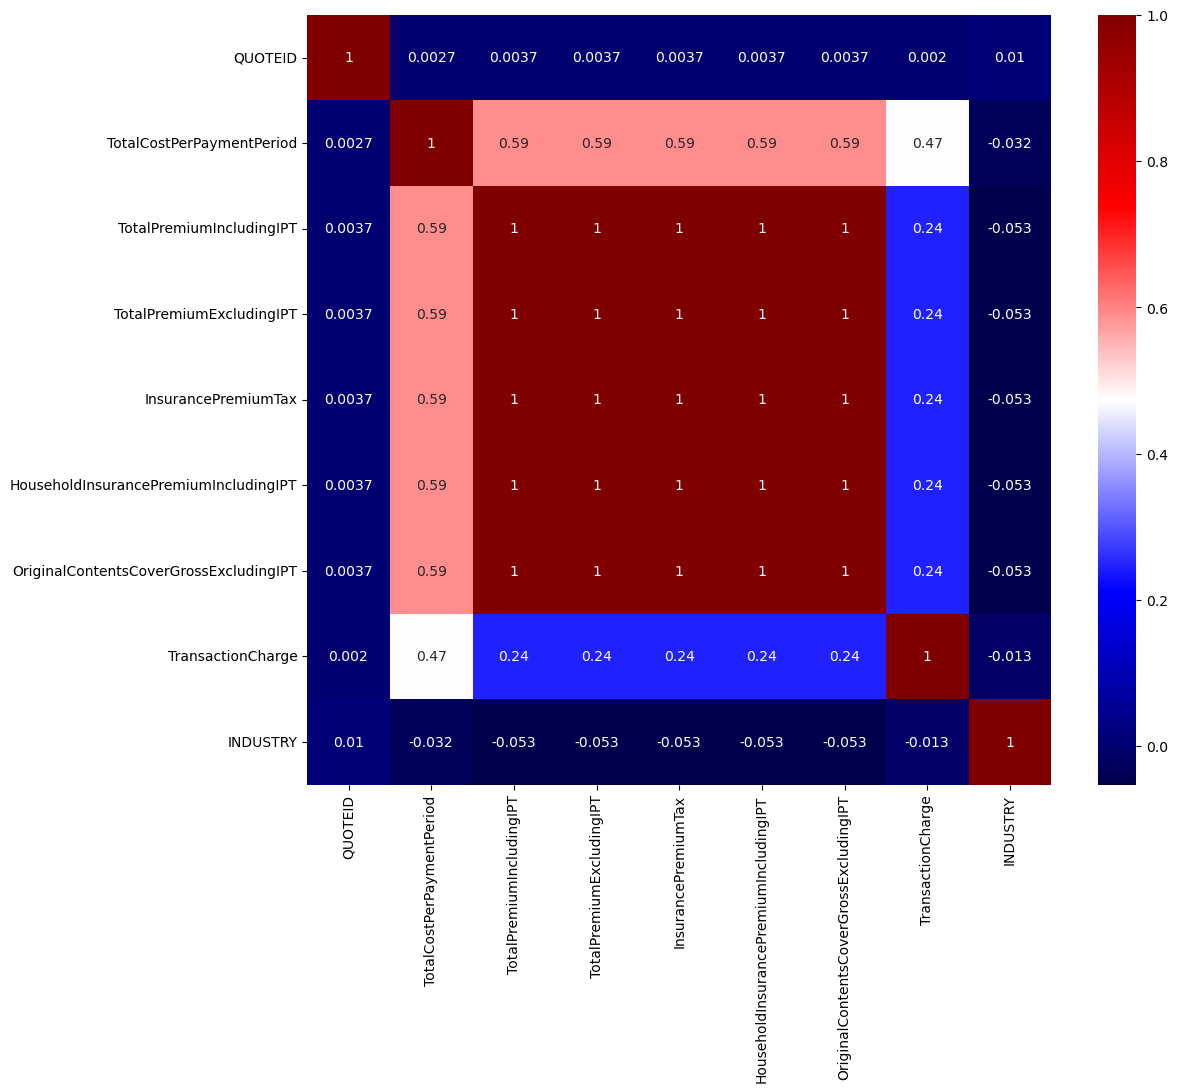

In [17]:
fig, ax = plt.subplots(figsize=(12,10))
corr = X_train.select_dtypes(['Int64', 'Float64']).corr() # Only selecting the numerical values here

sns.heatmap(corr, cmap='seismic', ax=ax,annot=corr,);

In [18]:
#Removing correlated columns 
columns_to_remove = ['TotalPremiumIncludingIPT', 'InsurancePremiumTax','HouseholdInsurancePremiumIncludingIPT', 'OriginalContentsCoverGrossExcludingIPT']  
X_train = X_train.drop(columns=columns_to_remove)

In [19]:
X_train.dtypes

QUOTEID                        int64
Insurer                       object
Product                       object
PaymentMethod                 object
PaymentFrequency              object
TotalCostPerPaymentPeriod    float64
TotalPremiumExcludingIPT     float64
TransactionCharge            float64
TITLE                         object
FORNAME                       object
SURNAME                       object
DOB                           object
OCCUPATION                    object
INDUSTRY                       int64
SECONDAPPLICANT                 bool
FIRSTTIMEBUYERS                 bool
COVERTYPE                     object
PREVIOUSCLAIMS                  bool
EXTRACONTENTS                   bool
ACCIDENTALCONTENTS              bool
NOCLAIMSCONTENTS              object
EXCESSCONTENTS                object
CONTENTSTOSPECIFY               bool
POSESSIONSTOTAL               object
POSESSIONSTOSPECIFY             bool
PROPERTYTYPE                  object
NUMBEDROOMS                   object
I

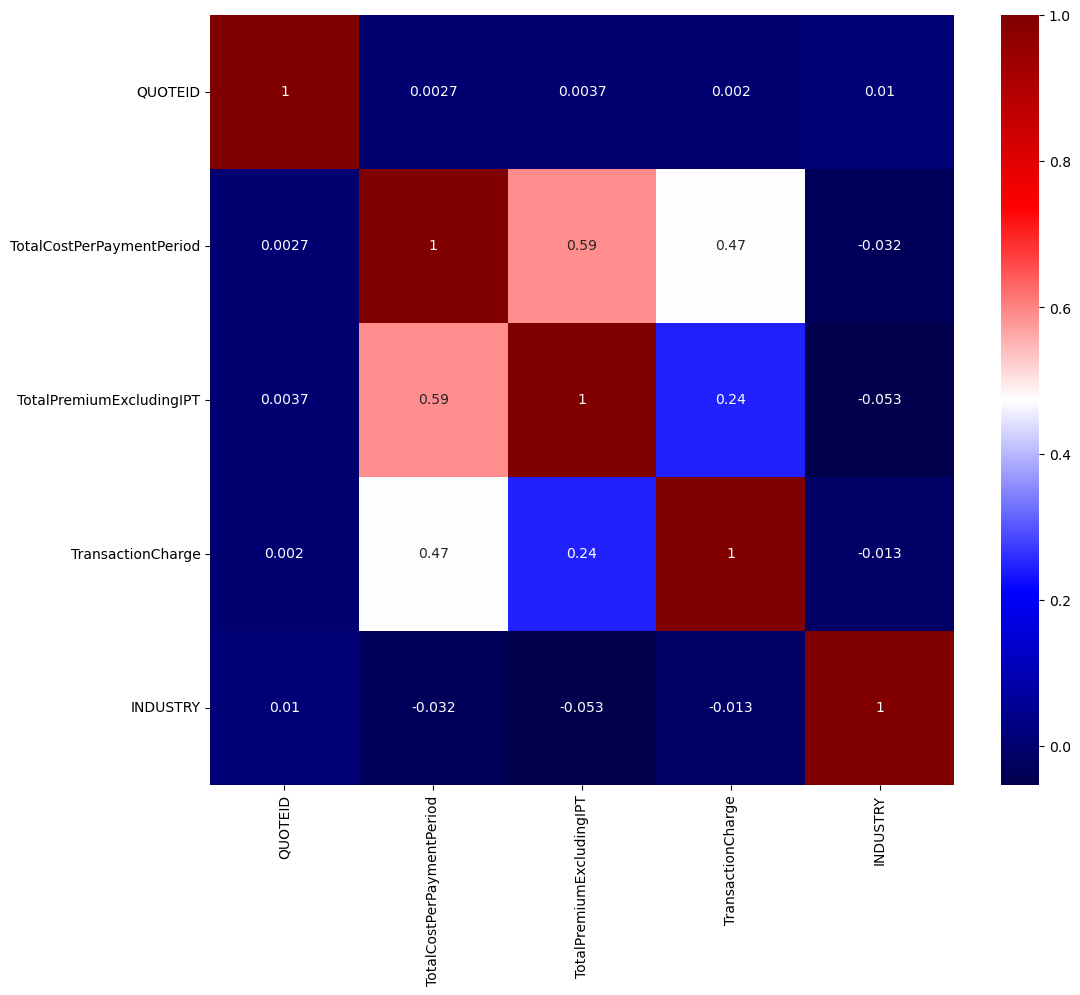

In [20]:
fig, ax = plt.subplots(figsize=(12,10))
corr = X_train.select_dtypes(['Int64', 'Float64']).corr() # Only selecting the numerical values here

sns.heatmap(corr, cmap='seismic', ax=ax,annot=corr,);

In [21]:
# To make my life easier, I create a DataFrame of data types
data_types = pd.DataFrame(X_train.dtypes, columns=['Data Type'])

In [22]:
# This is the different data types in my collections:
data_types.value_counts()

Data Type
object       21
bool         19
float64       3
int64         2
Name: count, dtype: int64

In [23]:
# Let's see the categorical data
X_train.select_dtypes('object')

,Insurer,Product,PaymentMethod,PaymentFrequency,TITLE,FORNAME,SURNAME,DOB,OCCUPATION,COVERTYPE,...,EXCESSCONTENTS,POSESSIONSTOTAL,PROPERTYTYPE,NUMBEDROOMS,INSUREDPOSTCODE,INSUREDSTREET,INSUREDTOWN,WALLCONSTRUCTION,ROOFCONSTRUCTION,ALARMTYPE
ID,,,,,,,,,,,,,,,,,,,,,
211255,B,Home Insurance,DirectDebit,Monthly,Mr,Joe,Smith,01/01/1976,38,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Three,W41PF,Station Road,Stanton,Brick,Slate,NoAlarm
21383,B,Home Insurance,DebitCard,Annual,Mr,Joe,Smith,01/01/1976,E09,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,One,N168ED,Station Road,Stanton,Brick,Slate,NonMaintained
201557,A,Home Insurance,CreditCard,Annual,Mr,Joe,Smith,01/01/1996,M06,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Three,SW81AG,Station Road,Stanton,Brick,Slate,NoAlarm
264565,C,Home Insurance,DirectDebit,Monthly,Mr,Joe,Smith,01/01/1976,870,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,One,NW51AN,Station Road,Stanton,Brick,Slate,NonMaintained
287134,B,Home Insurance,DirectDebit,Monthly2MonthsFree,Mr,Joe,Smith,01/01/1986,38,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Three,SW67AP,Station Road,Stanton,Brick,Slate,NoAlarm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259179,D,Home Insurance,DirectDebit,Monthly2MonthsFree,Mr,Joe,Smith,01/01/1976,199,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Five,NW80AG,Station Road,Stanton,Brick,Slate,NoAlarm
365839,E,Home Insurance,DirectDebit,Monthly2MonthsFree,Mr,Joe,Smith,01/01/1991,D78,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Three,SW49EL,Station Road,Stanton,Brick,Slate,NonMaintained
131933,F,Home Insurance,DebitCard,Annual,Mr,Joe,Smith,01/01/1996,E09,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Three,SE41AE,Station Road,Stanton,Brick,Slate,NoAlarm


In [24]:
# And the numerical data

X_train.select_dtypes(['int64','float64'])

,QUOTEID,TotalCostPerPaymentPeriod,TotalPremiumExcludingIPT,TransactionCharge,INDUSTRY
ID,,,,,
211255,10089,14.46,143.43,0.00,782
21383,1400,249.92,227.20,0.00,653
201557,9639,240.45,215.36,3.55,117
264565,12680,15.60,154.72,0.00,295
287134,13845,22.41,185.22,0.00,782
...,...,...,...,...,...
259179,12443,44.96,371.57,0.00,811
365839,18130,31.02,256.36,0.00,130
131933,7047,305.59,277.81,0.00,653


In [25]:
#check for empty values
print('Empty values in the training set')
print(X_train.isna().sum())

Empty values in the training set
QUOTEID                      0
Insurer                      0
Product                      0
PaymentMethod                0
PaymentFrequency             0
TotalCostPerPaymentPeriod    0
TotalPremiumExcludingIPT     0
TransactionCharge            0
TITLE                        0
FORNAME                      0
SURNAME                      0
DOB                          0
OCCUPATION                   0
INDUSTRY                     0
SECONDAPPLICANT              0
FIRSTTIMEBUYERS              0
COVERTYPE                    0
PREVIOUSCLAIMS               0
EXTRACONTENTS                0
ACCIDENTALCONTENTS           0
NOCLAIMSCONTENTS             0
EXCESSCONTENTS               0
CONTENTSTOSPECIFY            0
POSESSIONSTOTAL              0
POSESSIONSTOSPECIFY          0
PROPERTYTYPE                 0
NUMBEDROOMS                  0
INSUREDPOSTCODE              0
INSUREDSTREET                0
INSUREDTOWN                  0
WALLCONSTRUCTION             0
ROOFCO

# Scaling

In [26]:
# Check for float and int variables
floatv = X_train.dtypes[X_train.dtypes=='float64'].index.values
intv = X_train.dtypes[X_train.dtypes=='int64'].index.values

# vstack the two data types into one numpy array
numerical_columns = np.hstack([floatv,intv])

#Transform numerical_colums to a list to more easily remove the two features
numerical_columns = numerical_columns.tolist()


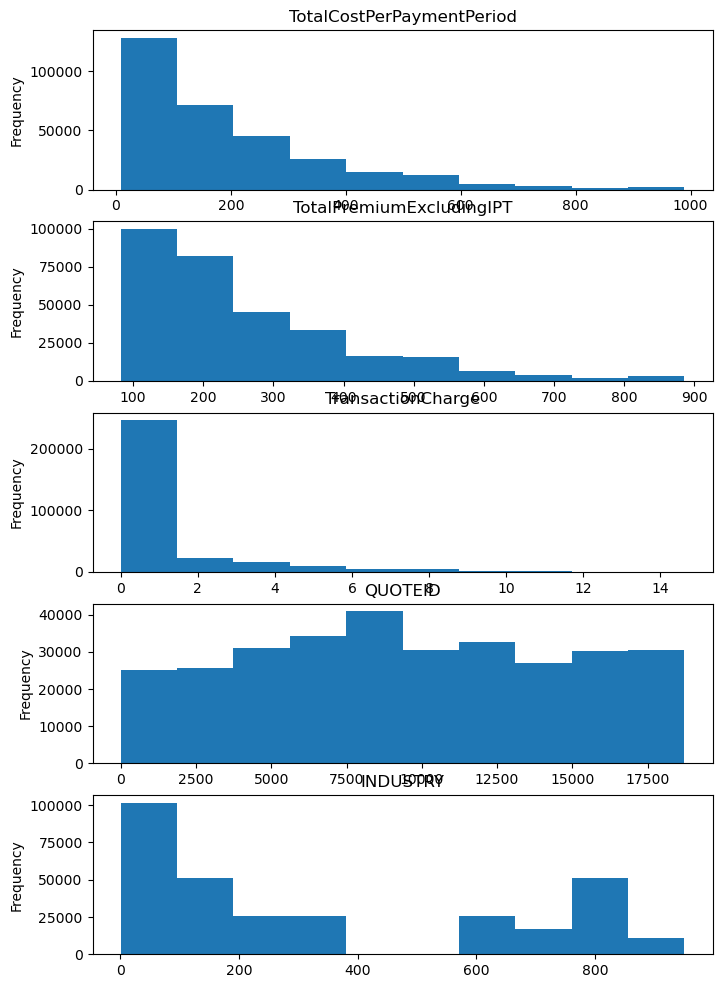

In [27]:
# Create a few plot to check the distribution of the data
fig, axes = plt.subplots(len(numerical_columns),figsize=(8, 12))

for ax, feature in zip(axes, numerical_columns):
    X_train[feature].plot(kind='hist', ax=ax)
    ax.set_title(feature)

In [28]:
#apply robustness to numerical col
from sklearn.preprocessing import RobustScaler


## Encoding

In [29]:
# Let's see the categorical data
X_train.select_dtypes('object')

,Insurer,Product,PaymentMethod,PaymentFrequency,TITLE,FORNAME,SURNAME,DOB,OCCUPATION,COVERTYPE,...,EXCESSCONTENTS,POSESSIONSTOTAL,PROPERTYTYPE,NUMBEDROOMS,INSUREDPOSTCODE,INSUREDSTREET,INSUREDTOWN,WALLCONSTRUCTION,ROOFCONSTRUCTION,ALARMTYPE
ID,,,,,,,,,,,,,,,,,,,,,
211255,B,Home Insurance,DirectDebit,Monthly,Mr,Joe,Smith,01/01/1976,38,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Three,W41PF,Station Road,Stanton,Brick,Slate,NoAlarm
21383,B,Home Insurance,DebitCard,Annual,Mr,Joe,Smith,01/01/1976,E09,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,One,N168ED,Station Road,Stanton,Brick,Slate,NonMaintained
201557,A,Home Insurance,CreditCard,Annual,Mr,Joe,Smith,01/01/1996,M06,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Three,SW81AG,Station Road,Stanton,Brick,Slate,NoAlarm
264565,C,Home Insurance,DirectDebit,Monthly,Mr,Joe,Smith,01/01/1976,870,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,One,NW51AN,Station Road,Stanton,Brick,Slate,NonMaintained
287134,B,Home Insurance,DirectDebit,Monthly2MonthsFree,Mr,Joe,Smith,01/01/1986,38,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Three,SW67AP,Station Road,Stanton,Brick,Slate,NoAlarm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259179,D,Home Insurance,DirectDebit,Monthly2MonthsFree,Mr,Joe,Smith,01/01/1976,199,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Five,NW80AG,Station Road,Stanton,Brick,Slate,NoAlarm
365839,E,Home Insurance,DirectDebit,Monthly2MonthsFree,Mr,Joe,Smith,01/01/1991,D78,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Three,SW49EL,Station Road,Stanton,Brick,Slate,NonMaintained
131933,F,Home Insurance,DebitCard,Annual,Mr,Joe,Smith,01/01/1996,E09,ContentsOnly,...,TwoHundredAndFifty,TwoTHousandFiveHundred,Flat,Three,SE41AE,Station Road,Stanton,Brick,Slate,NoAlarm


In [30]:
# Drop the columns that are not needed
X_train.drop(['Product','TITLE','FORNAME','SURNAME','COVERTYPE','EXCESSCONTENTS','DOB','POSESSIONSTOTAL','WALLCONSTRUCTION','PROPERTYTYPE','INSUREDSTREET','INSUREDTOWN','ROOFCONSTRUCTION','NOCLAIMSCONTENTS'],axis=1,inplace=True)

In [31]:
X_train.INSUREDPOSTCODE.value_counts()

INSUREDPOSTCODE
OX51AA     14163
E179PU     14017
E182ED     13967
SE220AD    13880
SE41AE     13830
SW49EL     13705
SW40AL     13623
SW71AA     13427
SW81AG     11620
W51SR      11594
SW90NS     11285
N160RR     10641
NW51AN     10614
N168ED     10587
NW80AG     10534
W41PF      10055
NW31EA      9378
SE240AX     9202
HA19NA      9197
SW67AP      9072
SE155NP     9007
W91AE       8777
NW51PU      8529
SE173LX     8499
E32JZ       8473
N65TX       8301
SW64ED      7066
N226BG      6226
NW67DL      6223
E95EU       2528
Name: count, dtype: int64

👇 Investigate the non-numerical features that require encoding, and apply 'One hot encoding'. To ensure that we do not end up with an explosion of feature, we will retain only categorical features with <15 unique values for encoding. 


In [32]:
# First, let's obtain the ohe_features of dtype 'object'
ohe_features = X_train.dtypes[X_train.dtypes==object].index.values

In [33]:
# Now we can loop through each feature to ensure their nunique
small_ohe = []

for feature in ohe_features:
    if (X_train[feature].nunique()<15):
        small_ohe.append(feature)
small_ohe

['Insurer',
 'PaymentMethod',
 'PaymentFrequency',
 'OCCUPATION',
 'NUMBEDROOMS',
 'ALARMTYPE']

Target balance

In [34]:
y_train

ID
211255    151.70
21383      99.25
201557    192.59
264565    106.18
287134    174.45
           ...  
259179    229.64
365839    123.21
131933    215.05
146868    124.08
121959    160.26
Name: QUOTEID, Length: 308020, dtype: float64

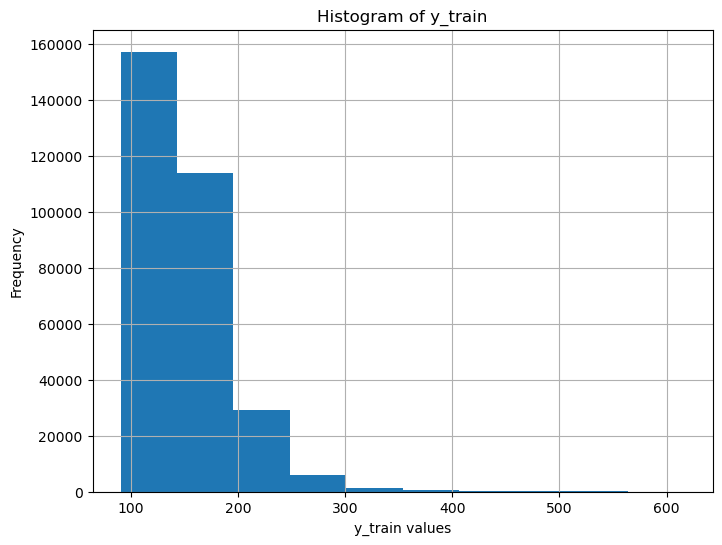

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(y_train, 
         #bins=30 
        )
plt.title('Histogram of y_train')
plt.xlabel('y_train values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Part 2: Modelling 

In [36]:
from sklearn import set_config
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.compose import ColumnTransformer

In [37]:
#All transformers return pandas dataframe
set_config(transform_output="pandas")
set_config(display='diagram')

In [38]:
X_train.select_dtypes(exclude=np.number).columns

Index(['Insurer', 'PaymentMethod', 'PaymentFrequency', 'OCCUPATION',
       'SECONDAPPLICANT', 'FIRSTTIMEBUYERS', 'PREVIOUSCLAIMS', 'EXTRACONTENTS',
       'ACCIDENTALCONTENTS', 'CONTENTSTOSPECIFY', 'POSESSIONSTOSPECIFY',
       'NUMBEDROOMS', 'INSUREDPOSTCODE', 'WINDOWLOCKSFITTED', 'ALARMTYPE',
       'LEGALASSIST', 'HOMEEMERGENCY', 'CREDITREPORT', 'PERMOCCUPIED',
       'SUBSIDENCE', 'CONVICTIONS', 'INSURANCEDECLINES', 'FLOODING',
       'UNOCCUPIED60', 'BUSINESSPURPOSES', 'UNMORTGAGEAPP'],
      dtype='object')

In [39]:
X_train.select_dtypes(include=np.number).columns

Index(['QUOTEID', 'TotalCostPerPaymentPeriod', 'TotalPremiumExcludingIPT',
       'TransactionCharge', 'INDUSTRY'],
      dtype='object')

In [40]:
X_train.select_dtypes(include=np.number).columns

Index(['QUOTEID', 'TotalCostPerPaymentPeriod', 'TotalPremiumExcludingIPT',
       'TransactionCharge', 'INDUSTRY'],
      dtype='object')

In [41]:
X_train.select_dtypes(include=np.number).columns

Index(['QUOTEID', 'TotalCostPerPaymentPeriod', 'TotalPremiumExcludingIPT',
       'TransactionCharge', 'INDUSTRY'],
      dtype='object')

In [42]:
X_train[small_ohe].columns

Index(['Insurer', 'PaymentMethod', 'PaymentFrequency', 'OCCUPATION',
       'NUMBEDROOMS', 'ALARMTYPE'],
      dtype='object')

In [43]:
X_train.select_dtypes(exclude=np.number).columns

Index(['Insurer', 'PaymentMethod', 'PaymentFrequency', 'OCCUPATION',
       'SECONDAPPLICANT', 'FIRSTTIMEBUYERS', 'PREVIOUSCLAIMS', 'EXTRACONTENTS',
       'ACCIDENTALCONTENTS', 'CONTENTSTOSPECIFY', 'POSESSIONSTOSPECIFY',
       'NUMBEDROOMS', 'INSUREDPOSTCODE', 'WINDOWLOCKSFITTED', 'ALARMTYPE',
       'LEGALASSIST', 'HOMEEMERGENCY', 'CREDITREPORT', 'PERMOCCUPIED',
       'SUBSIDENCE', 'CONVICTIONS', 'INSURANCEDECLINES', 'FLOODING',
       'UNOCCUPIED60', 'BUSINESSPURPOSES', 'UNMORTGAGEAPP'],
      dtype='object')

In [44]:
X_train[small_ohe].columns

Index(['Insurer', 'PaymentMethod', 'PaymentFrequency', 'OCCUPATION',
       'NUMBEDROOMS', 'ALARMTYPE'],
      dtype='object')

In [45]:
small_ohe

['Insurer',
 'PaymentMethod',
 'PaymentFrequency',
 'OCCUPATION',
 'NUMBEDROOMS',
 'ALARMTYPE']

In [46]:
# Your categorical feature columns for one-hot encoding
small_ohe = ['Insurer', 'PaymentMethod', 'PaymentFrequency', 'OCCUPATION', 'NUMBEDROOMS', 'ALARMTYPE']

num_pipe = make_pipeline(RobustScaler())

# Categorical Data
cat_pipe = make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse_output=False))

# Define the ColumnTransformer
preproc_pipe = ColumnTransformer([
    ("num_prep", num_pipe, X_train.select_dtypes(include=np.number).columns), 
    ("cat_prep", cat_pipe, small_ohe) ]) 





In [47]:
#Numerical Data
num_pipe = make_pipeline(RobustScaler())

#Categorical Data
cat_pipe = make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse_output=False))

preproc_pipe = ColumnTransformer([
    ("num_prep", num_pipe, X_train.select_dtypes(include=np.number).columns),
    ("cat_prep", cat_pipe, X_train[small_ohe].columns)])

In [48]:
preproc_pipe.fit(X_train)

ColumnTransformer(transformers=[('num_prep',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 Index(['QUOTEID', 'TotalCostPerPaymentPeriod', 'TotalPremiumExcludingIPT',
       'TransactionCharge', 'INDUSTRY'],
      dtype='object')),
                                ('cat_prep',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Insurer', 'PaymentMethod', 'PaymentFrequency', 'OCCUPATION',
       'NUMBEDROOMS', 'ALARMTYPE'],
      dtype='object'))])

In [49]:
X_train

,QUOTEID,Insurer,PaymentMethod,PaymentFrequency,TotalCostPerPaymentPeriod,TotalPremiumExcludingIPT,TransactionCharge,OCCUPATION,INDUSTRY,SECONDAPPLICANT,...,HOMEEMERGENCY,CREDITREPORT,PERMOCCUPIED,SUBSIDENCE,CONVICTIONS,INSURANCEDECLINES,FLOODING,UNOCCUPIED60,BUSINESSPURPOSES,UNMORTGAGEAPP
ID,,,,,,,,,,,,,,,,,,,,,
211255,10089,B,DirectDebit,Monthly,14.46,143.43,0.00,38,782,False,...,False,True,True,False,False,False,False,False,False,False
21383,1400,B,DebitCard,Annual,249.92,227.20,0.00,E09,653,False,...,False,True,True,False,False,False,False,False,False,False
201557,9639,A,CreditCard,Annual,240.45,215.36,3.55,M06,117,False,...,False,True,True,False,False,False,False,False,False,False
264565,12680,C,DirectDebit,Monthly,15.60,154.72,0.00,870,295,False,...,False,True,True,False,False,False,False,False,False,False
287134,13845,B,DirectDebit,Monthly2MonthsFree,22.41,185.22,0.00,38,782,False,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259179,12443,D,DirectDebit,Monthly2MonthsFree,44.96,371.57,0.00,199,811,False,...,False,True,True,False,False,False,False,False,False,False
365839,18130,E,DirectDebit,Monthly2MonthsFree,31.02,256.36,0.00,D78,130,False,...,False,True,True,False,False,False,False,False,False,False
131933,7047,F,DebitCard,Annual,305.59,277.81,0.00,E09,653,False,...,False,True,True,False,False,False,False,False,False,False


In [50]:


# Define the scoring dictionary for regression tasks
scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),  # Negated MSE
    'mean_absolute_error': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}


1. Baseline Model : Linear Regression

In [51]:
linear_model = Pipeline(steps=[
    ('preprocessor', preproc_pipe),
    ('classifier', LinearRegression())
])

In [52]:
# Perform cross-validation with the dummy regression model
cv_results = cross_validate(linear_model, X_train, y_train, cv=5, scoring=scoring)

# Print the cross-validation results for regression
print("Cross-validated Mean Squared Error:", -cv_results['test_neg_mean_squared_error'].mean())  # Negate back to positive
print("Cross-validated Mean Absolute Error:", cv_results['test_mean_absolute_error'].mean())
print("Cross-validated R2 Score:", cv_results['test_r2'].mean())


Cross-validated Mean Squared Error: 776.1619323118247
Cross-validated Mean Absolute Error: 18.916913871258355
Cross-validated R2 Score: 0.5383867328472587


2. Random Forest Model

In [53]:
random_forest_model = Pipeline(steps=[
    ('preprocessor', preproc_pipe),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [54]:
cv_results = cross_validate(random_forest_model, X_train, y_train, cv=5, scoring=scoring)

print("Cross-validated Mean Squared Error:", -cv_results['test_neg_mean_squared_error'].mean())  # Negate back to positive
print("Cross-validated Mean Absolute Error:", cv_results['test_mean_absolute_error'].mean())
print("Cross-validated R2 Score:", cv_results['test_r2'].mean())


Cross-validated Mean Squared Error: 3.0131033274404304
Cross-validated Mean Absolute Error: 0.38208327056692426
Cross-validated R2 Score: 0.9982076831079638


In [55]:
param_grid_rf = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
}

grid_search_rf = GridSearchCV(random_forest_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_prep',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler())]),
                                                                         Index(['QUOTEID', 'TotalCostPerPaymentPeriod', 'TotalPremiumExcludingIPT',
       'TransactionCharge', 'INDUSTRY'],
      dtype='object')),
                                                                        ('cat_prep',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Insurer', 'PaymentMethod', 'PaymentFrequency', 'OCCUPATION',
       'NUMBEDROOMS', 'ALARMTYPE'],
      dtype='object'))])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [56]:
best_params = grid_search_rf.best_params_

# Print the best parameters
print(f'Best Parameters: {best_params}')


print("Best Cross-Validation Score (MSE):", -grid_search_rf.best_score_)

Best Parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 300}
Best Cross-Validation Score (MSE): 2.995232381108931


In [ ]:
best_model_rf = grid_search_rf.best_estimator_

In [ ]:

y_pred_rf = best_model_rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred_rf)
mae = np.mean(np.abs(y_test - y_pred_rf))
r2 = best_model_rf.score(X_test, y_test)

print("Test Mean Squared Error:", mse)
print("Test Mean Absolute Error:", mae)
print("Test R2 Score:", r2)

3. Gradient Boosting methods : XGBoost

In [57]:
xgboost_model = Pipeline(steps=[
    ('preprocessor', preproc_pipe),
    ('regressor', XGBRegressor())
])

In [58]:
cv_results = cross_validate(xgboost_model, X_train, y_train, cv=5, scoring=scoring)

# Print the cross-validation results for regression
print("Cross-validated Mean Squared Error:", -cv_results['test_neg_mean_squared_error'].mean())  # Negate back to positive
print("Cross-validated Mean Absolute Error:", cv_results['test_mean_absolute_error'].mean())
print("Cross-validated R2 Score:", cv_results['test_r2'].mean())


Cross-validated Mean Squared Error: 52.99412638956935
Cross-validated Mean Absolute Error: 4.551795844387245
Cross-validated R2 Score: 0.9684778155760785


In [ ]:
param_grid = {
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__n_estimators': [100, 200, 300]
}


grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)  


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_

# Print the best parameters
print(f'Best Parameters: {best_params}')


print("Best Cross-Validation Score (MSE):", -grid_search.best_score_)

Best Parameters: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 7, 'regressor__n_estimators': 300}
Best Cross-Validation Score (MSE): 19.67226202822381


In [60]:
best_model = grid_search.best_estimator_

In [61]:

cv_results = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring)

# Print the cross-validation results for regression
print("Cross-validated Mean Squared Error:", -cv_results['test_neg_mean_squared_error'].mean())  # Negate back to positive
print("Cross-validated Mean Absolute Error:", cv_results['test_mean_absolute_error'].mean())
print("Cross-validated R2 Score:", cv_results['test_r2'].mean())


Cross-validated Mean Squared Error: 19.67226202822381
Cross-validated Mean Absolute Error: 2.5594293080682795
Cross-validated R2 Score: 0.988298352412165


The best trained model is the Random Forest model with the following parameters:
- n_estimators: 300
- max_depth: None


With more time : 
- consider geospatial correlation 
- run hyperparameters tuning 
- build the class lowestpricepredictor
